# Pospischil sPYr Example

### Install dependencies for ACT and setup environment

In [18]:
!pip install act-neuron

import os
import sys

from act import simulator, analysis
from IPython.display import Image
import numpy as np

# Download the repository with all relevant model files if in google colab
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !rm -rf ./ACT
    !git clone https://github.com/V-Marco/ACT
    base_dir = "./ACT"
else:
    base_dir = "../.."

### The non-segregated approach

Define a config file for ACT to run a simulation.

In [34]:
config = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/Pospischil/sPyr/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/Pospischil/sPyr/orig_modfiles"),
        "name": "sPYr",
    },
    "simulation_parameters": {
        "h_v_init": -70.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "g_pas", "low": 5.0e-06, "high": 2.0e-05},
            {"channel": "gnabar_hh2", "low": 2.5e-02, "high": 1.0e-01},
            {"channel": "gkbar_hh2", "low": 2.5e-03, "high": 1.0e-02},
            {"channel": "gkbar_im", "low": 1.5e-05, "high": 6.0e-05},
            {"channel": "gcabar_it", "low": 5.0e-04, "high": 2.0e-03},
        ],
        "target_V": None,  # Target voltages
        "target_params": [1e-5, 0.05, 0.005, 3e-5, 0.001],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        {
            "params": ["g_pas"],
            "voltage": [-100, -65],
            "time": [0, 500],
        },
        {
            "params": ["gnabar_hh2", "gkbar_hh2", "gkbar_im", "gcabar_it"],
            "voltage": [-65, 100],
            "time": [0, 2000],
        },
    ],
    "output": {"folder": "output_Pospischil_sPYr", "produce_plots": True},
    "run_mode": "original",  # "original", "segregated"
}

In [35]:
# Run the simulation

simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating cadecay_destexhe.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/cadecay_destexhe.c
Translating HH_traub.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/HH_traub.c
Translating IM_cortex.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IM_cortex.c
Thread Safe
Notice: VERBATIM blocks are not thread safe
Thread Safe
Notice: This mechanism cannot be used with CVODE
Translating IT_huguenard.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IT_huguenard.c
Thread Safe


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/IT_huguenard.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/cadecay_destexhe.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/HH_traub.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/IM_cortex.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/IT_huguenard.mod
 -> Compiling cadecay_destexhe.c
 -> Compiling IM_cortex.c
 -> Compiling HH_traub.c
 -> Compiling IT_huguenard.c
 => LINKING shar

NEURON: The user defined name already exists: cad
 near line 0
 ^
        nrn_load_dll("./x86_64/....")


Successfully created x86_64/special

(2023-09-07 10:19:19.164443)-[START]
(2023-09-07 10:19:19.164486)-[INFO]: Number of amplitudes: 120
(2023-09-07 10:19:19.172206)-[INFO]: Mod files already loaded. Continuing.
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-07 10:20:03.881093)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-07 10:20:03.941977)-[INFO]: Matching 12 amplitudes.
(2023-09-07 10:20:47.722963)-[INFO]: Total amplitudes matched: 8/12.
(2023-09-07 10:21:28.369055)-[INFO]: Total amplitudes matched: 16/12.
(2023-09-07 10:21:28.373730)-[INFO]: Matched amplitudes: [0.3 1.  1.3 1.4 1.7 1.8 1.9 2.4 2.8 3.3 3.6 5.2 6.2 7.8 8.9 9.1]
(2023-09-07 10:21:28.566192)-[INFO]: Training a model with SGD optimizer and lr = 1e-8.
(2023-09-07 10:21:28.566249)-[INFO]: Number of trainable parameters: 20547333
(2023-09-07 10:21

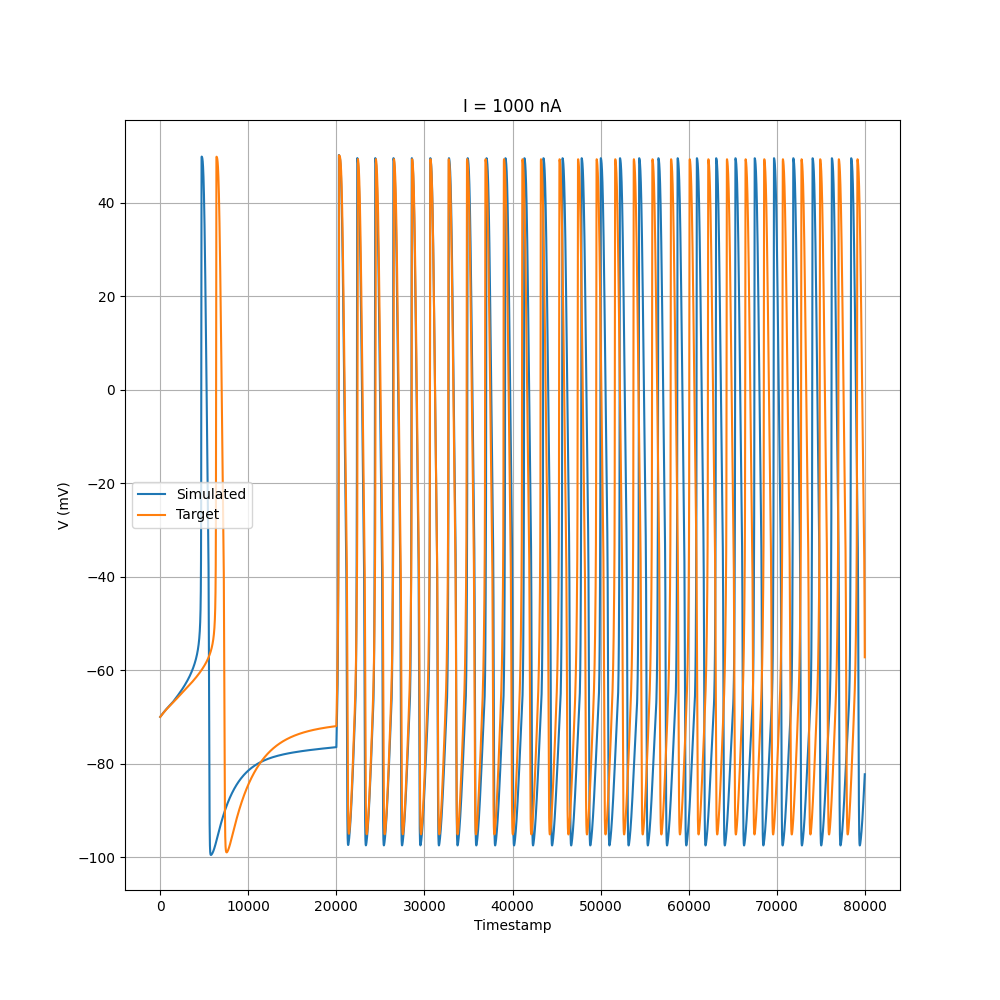

In [36]:
Image(filename="./output_Pospischil_sPYr/original/1000nA.png")

In [37]:
analysis.print_run_stats(config)

output_Pospischil_sPYr : original
Med MSE: 2668.3278 (1016.3886)
Med Corr: 0.2846 (0.2743)

Predicted values:
     g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.00001    0.086468   0.009999   0.00006      0.002
Target values:
     g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.00001        0.05      0.005   0.00003      0.001
Error:
          g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  4.410610e-07    0.036468   0.004999   0.00003      0.001

Pred MAE: 0.0085

Passive properties:
{
  "leak_conductance_variable": null,
  "leak_reversal_variable": null,
  "r_in": 183.6608123779297,
  "tau": 53.125,
  "v_rest": -76.47604370117188
}
----------



### Segregation with analytical setting of passive properties

In this section, let's set the passive properties for the cell so they can be analytically determined instead of using a model network.

In [29]:
config = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/Pospischil/sPyr/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/Pospischil/sPyr/seg_modfiles"),
        "name": "sPYr",
        "passive_properties": {
            "v_rest": -70.3,
            "r_in": 34,
            "tau": 9.41,
            "leak_conductance_variable": "g_pas",  # eg: g_leak
            "leak_reversal_variable": "e_pas",  # eg: e_leak
        },
    },
    "simulation_parameters": {
        "h_v_init": -70.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "gnabar_hh2", "low": 2.5e-02, "high": 1.0e-01},
            {"channel": "gkbar_hh2", "low": 2.5e-03, "high": 1.0e-02},
            {"channel": "gkbar_im", "low": 1.5e-05, "high": 6.0e-05},
            {"channel": "gcabar_it", "low": 5.0e-04, "high": 2.0e-03},
        ],
        "target_V": None,  # Target voltages
        "target_params": [0.05, 0.005, 3e-5, 0.001],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        {
            "params": ["gnabar_hh2", "gkbar_hh2", "gkbar_im", "gcabar_it"],
            "voltage": [-65, 100],
            "time": [0, 2000],
        },
    ],
    "output": {"folder": "output_Pospischil_sPYr_p", "produce_plots": True},
    "run_mode": "segregated",  # "original", "segregated"
}

In [30]:
simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating cadecay_destexhe.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/cadecay_destexhe.c
Translating HH_traub.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/HH_traub.c
Notice: VERBATIM blocks are not thread safe
Translating IM_cortex.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IM_cortex.c
Thread Safe
Notice: This mechanism cannot be used with CVODE
Thread Safe
Translating IT_huguenard.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IT_huguenard.c
Thread Safe


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod
 -> Compiling cadecay_destexhe.c
 -> Compiling HH_traub.c
 -> Compiling IM_cortex.c
 -> Compiling IT_huguenard.c
 => LINKING shared library .

NEURON: The user defined name already exists: cad
 near line 0
 ^
        nrn_load_dll("./x86_64/....")


Successfully created x86_64/special

(2023-09-07 09:49:13.150458)-[START]
(2023-09-07 09:49:13.150500)-[INFO]: Number of amplitudes: 120
(2023-09-07 09:49:13.159625)-[INFO]: Mod files already loaded. Continuing.
Setting e_pas = -70.3
Setting sPYr[147].soma[0].g_pas = 0.00010158
Setting sPYr[147].soma[0].cm = 0.95591300
(2023-09-07 09:49:58.220062)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Setting e_pas = -70.3
Setting sPYr[148].soma[0].g_pas = 0.00010158
Setting sPYr[148].soma[0].cm = 0.95591300
(2023-09-07 09:49:58.286687)-[INFO]: Matching 12 amplitudes.
(2023-09-07 09:50:41.306688)-[INFO]: Total amplitudes matched: 0/12.
(2023-09-07 09:51:22.926878)-[INFO]: Total amplitudes matched: 0/12.
(2023-09-07 09:52:06.540169)-[INFO]: Total amplitudes matched: 1/12.
(2023-09-07 09:52:49.791852)-[INFO]: Total amplitudes matched: 5/12.
(2023-09-07 09:53:32.416314)-[INFO]: Total amplitudes matched: 6/12.
(2023-09-07 09:54:14.173369)-[INFO]: Total amplitudes matched: 8/12.
(2023-09-07

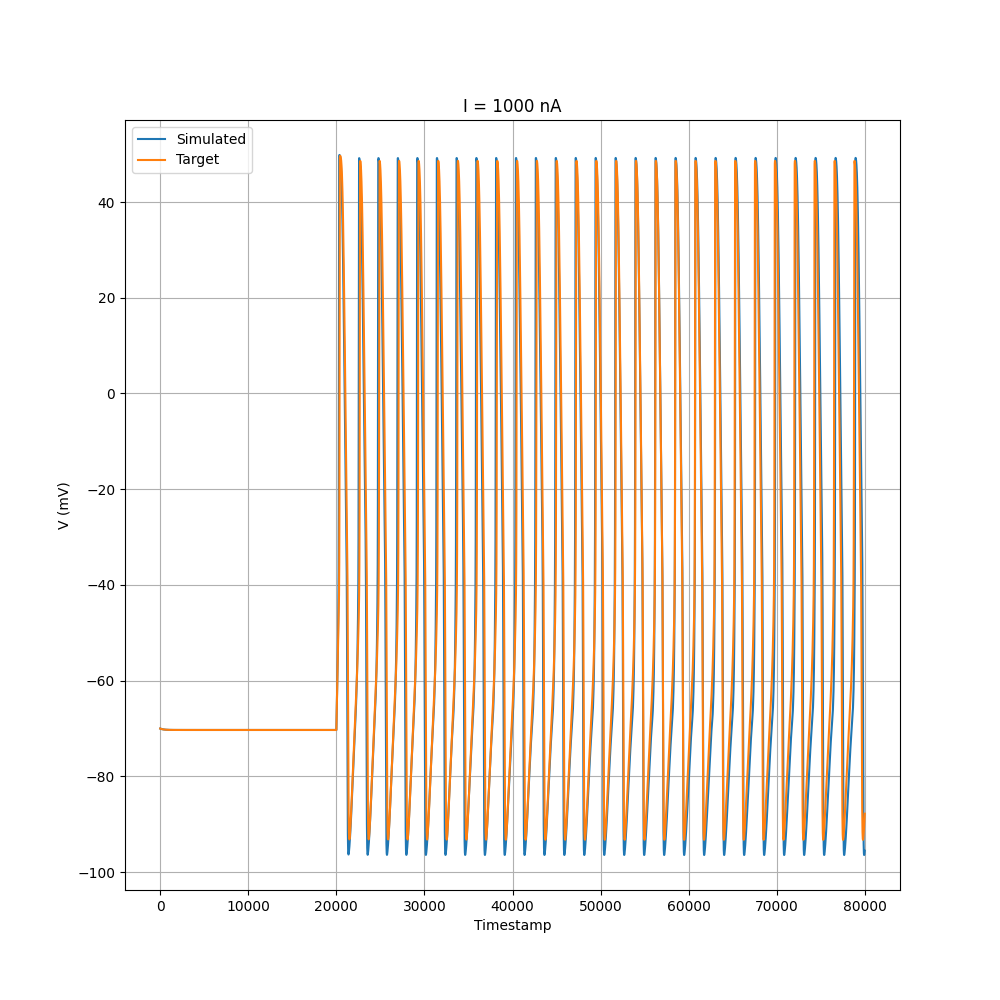

In [31]:
Image(filename="./output_Pospischil_sPYr_p/segregated/1000nA.png")

In [32]:
analysis.print_run_stats(config)

output_Pospischil_sPYr_p : segregated
Med MSE: 2235.5782 (1204.3994)
Med Corr: 0.2741 (0.3373)

Predicted values:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0         0.1    0.00998  0.000055      0.002
Target values:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0        0.05      0.005   0.00003      0.001
Error:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0        0.05    0.00498  0.000025      0.001

Pred MAE: 0.0140

Passive properties:
{
  "leak_conductance_variable": "g_pas",
  "leak_reversal_variable": "e_pas",
  "r_in": 33.99993896484375,
  "tau": 9.425,
  "v_rest": -70.30000305175781
}
----------



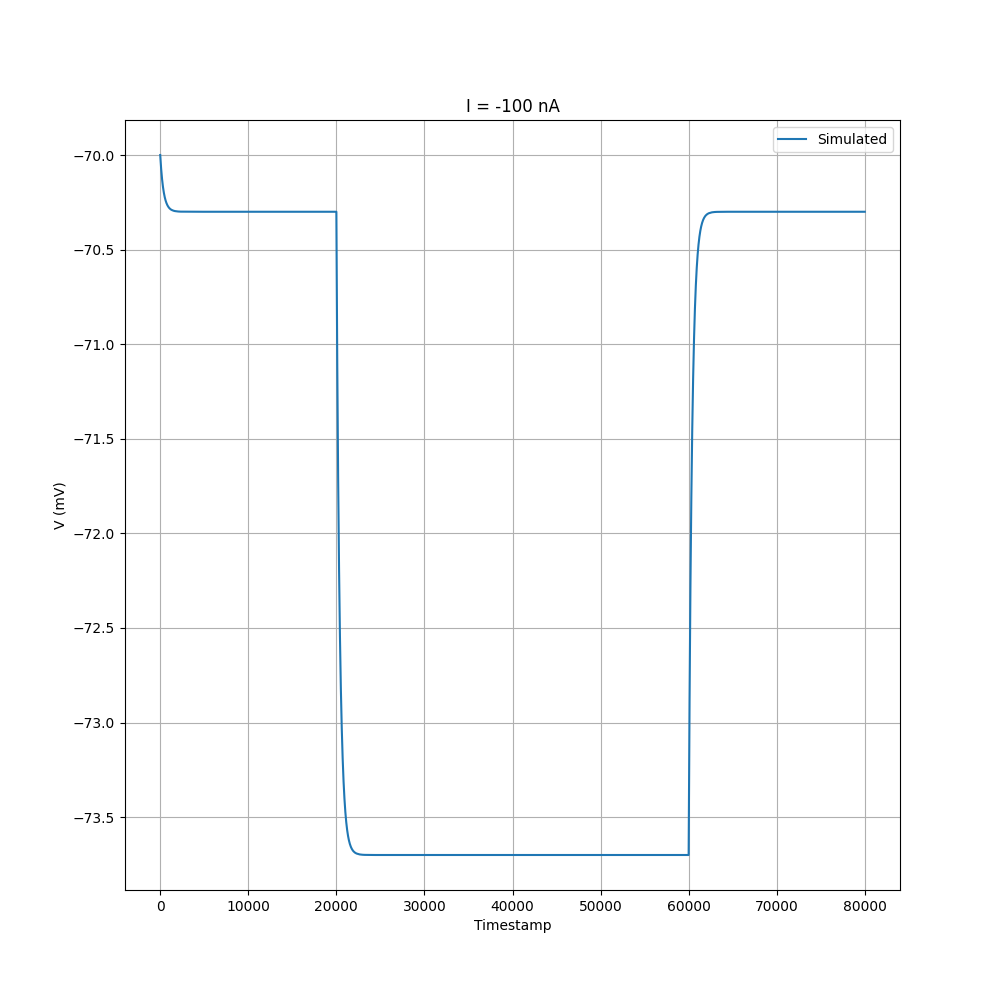

In [33]:
Image(filename="./output_Pospischil_sPYr_p/segregated/passive_-100nA.png")